In [17]:
import pandas as pd
from ta import *
import quandl
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = (7,5)
quandl.ApiConfig.api_key = "qSLpj7NBfDYjSwur4WVm"
%matplotlib inline

def get_quandl_data(quandl_id):
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        with open(cache_path, 'rb') as f:
            df = pickle.load(f)   
            print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns='pandas')
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

def RSI(df, column="Close", period=14):
    delta = df[column].diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=period - 1,  adjust=False).mean()
    rDown = down.ewm(com=period - 1, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)        
    df['RSI'] = rsi
    
def SMA(df, column="Close", period=20):
    sma = df[column].rolling(window=period, min_periods=period - 1).mean()
    df['SMA'] = sma    
    
def EMA(df, column="Close", period=20):
    ema = df[column].ewm(span=period, min_periods=period - 1).mean()
    df['EMA'] = ema    

def BollingerBand(df, column="Close", period=20):
    sma = df[column].rolling(window=period, min_periods=period - 1).mean()
    std = df[column].rolling(window=period, min_periods=period - 1).std()
    up = (sma + (std * 2))
    lower = (sma - (std * 2))
    df['BBUP'] = up
    df['BBLO'] = lower
    
def EMA26(df, column="Close", period=26):
    ema26 = df[column].ewm(span=period, min_periods=period - 1).mean()
    df['EMA26'] = ema26
    
def EMA12(df, column="Close", period=12):
    ema12 = df[column].ewm(span=period, min_periods=period - 1).mean()
    df['EMA12'] = ema12

def EMA9(df, column="MACD", period=9):
    ema9 = df[column].ewm(span=period, min_periods=period - 1).mean()
    df['EMA9'] = ema9
    
def SETUP():    
    df = get_quandl_data('BCHARTS/{}USD'.format('COINBASE'))
    RSI(df, column="Close", period=14)
    SMA(df, column="Close", period=20)
    EMA(df, column="Close", period=20)
    BollingerBand(df, column="Close", period=20)
    EMA26(df, column="Close", period=26)
    EMA12(df, column="Close", period=12)
    df['MACD'] = df['EMA12']-df['EMA26']
    EMA9(df, column="MACD", period=9)    
    Indic = df.tail(30)
    print(Indic)
    
    plt.plot(Indic['RSI'])
    plt.ylabel('Relative Strength Index')
    plt.xlabel('Time')
    plt.yscale('linear')
    plt.grid(True)
    plt.show()

    plt.plot(Indic['SMA'])
    plt.ylabel('Simple Moving Average')
    plt.xlabel('Time')
    plt.yscale('linear')
    plt.grid(True)
    plt.show()

    plt.plot(Indic['EMA'])
    plt.ylabel('Média móvel exponencial')
    plt.xlabel('Time')
    plt.yscale('linear')
    plt.grid(True)
    plt.show()

    plt.plot(Indic['BBUP'],label="UP")
    plt.plot(Indic['BBLO'],label="DOWN")
    plt.ylabel('BollingerBand')
    plt.xlabel('Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.yscale('linear')
    plt.grid(True)
    plt.show()

    plt.plot(Indic['EMA12'],label="EMA12")
    plt.plot(Indic['EMA26'],label="EMA26")
    plt.ylabel('MACD')
    plt.xlabel('Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.yscale('linear')
    plt.grid(True)
    plt.show()

    plt.plot(Indic['MACD'],label="MACD")
    plt.plot(Indic['EMA9'],label="EMA9")
    plt.ylabel('MACD')
    plt.xlabel('Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.yscale('linear')
    plt.grid(True)
    plt.show()
    


Loaded BCHARTS/COINBASEUSD from cache
               Open     High      Low    Close  Volume (BTC)  \
Date                                                           
2018-07-24  7720.08  8488.00  7695.99  8385.50  19343.033579   
2018-07-25  8390.04  8482.84  8042.00  8157.15  14447.139792   
2018-07-26  8157.15  8290.00  7840.00  7931.99  11687.854604   
2018-07-27  7932.00  8276.55  7787.29  8184.21  11632.569358   
2018-07-28  8182.64  8230.00  8065.00  8228.90   4075.463206   
2018-07-29  8227.38  8289.96  8127.87  8216.34   4215.064087   
2018-07-30  8216.33  8274.92  7850.00  8170.01  10267.783013   
2018-07-31  8170.00  8173.57  7629.48  7727.27  12546.580217   
2018-08-01  7727.28  7750.00  7437.00  7603.99  11042.406663   
2018-08-02  7603.99  7707.54  7462.00  7533.92   6782.020708   
2018-08-03  7533.92  7538.53  7285.00  7414.08  10854.107113   
2018-08-04  7414.08  7495.00  6940.00  7005.00   9375.944014   
2018-08-05  7005.00  7086.52  6880.00  7030.01   6159.975866   
20

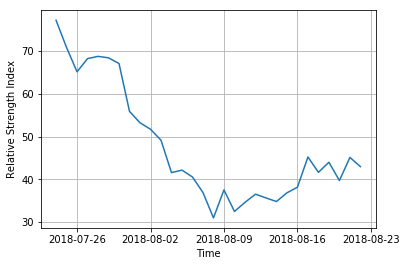

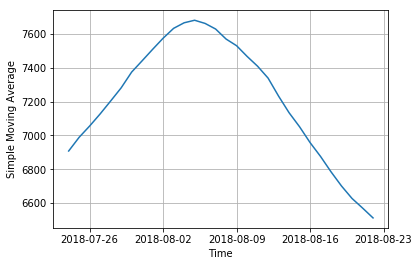

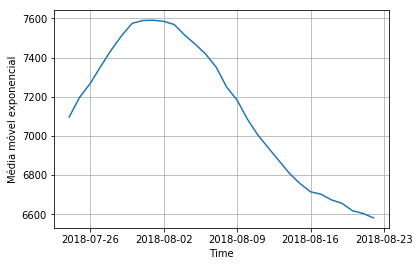

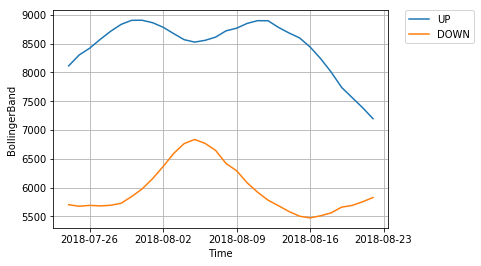

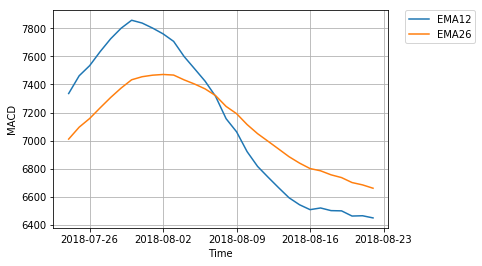

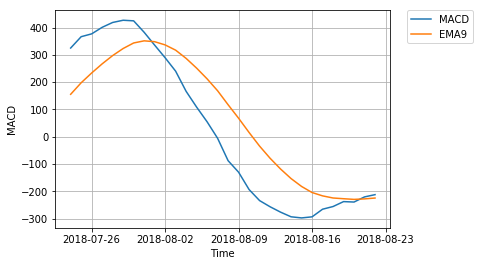

In [18]:
SETUP()